# **Facial Emotion Detection**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/Python_for_dataScience/Facial_emotion_images.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
folder_path = 'Facial_emotion_images/'


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

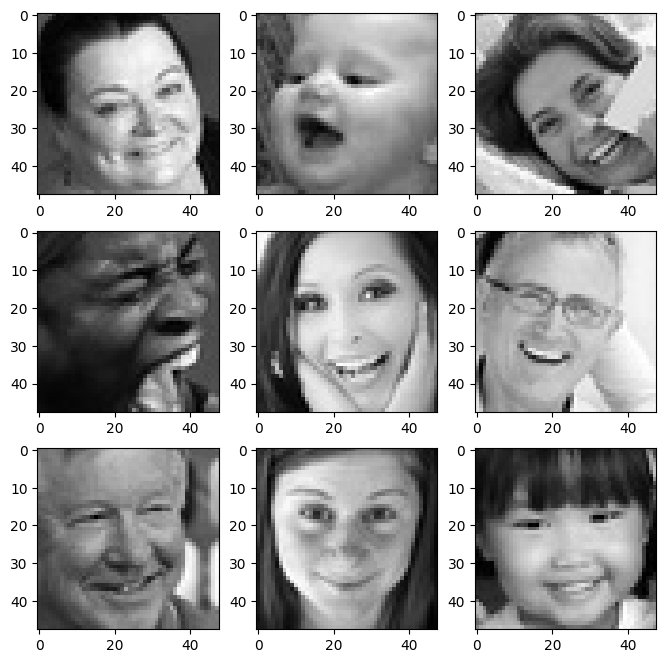

In [6]:
sub_folder = 'happy'


plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = mpimg.imread(folder_path + "train/" + sub_folder + "/" +
                  os.listdir(folder_path + "train/" + sub_folder)[i])
    plt.imshow(img,cmap='gray')

plt.show()

**Observations and Insights:__**

Happy faces images can provide insights into facial expressions, such as the intensity of the smile, the presence of other facial expressions (e.g., raised eyebrows, showing teeth), and the variation in smiles among different individuals.

### **Sad**

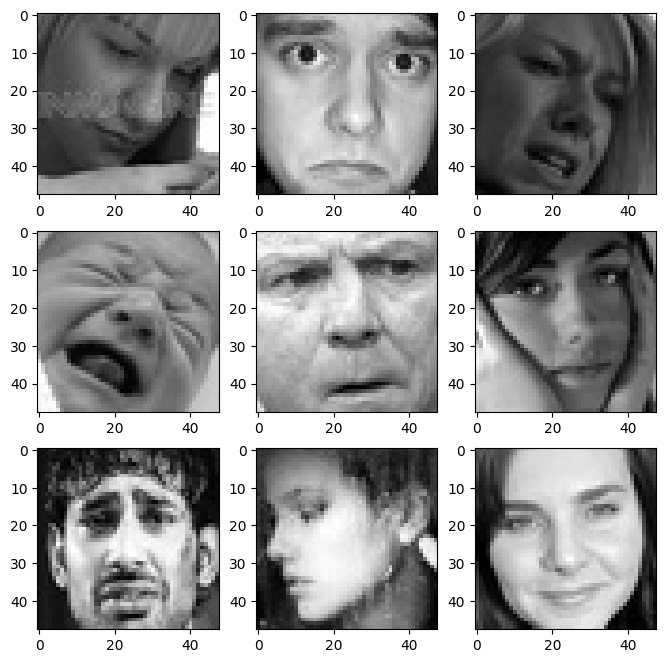

In [6]:
sub_folder = 'sad'


plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = mpimg.imread(folder_path + "train/" + sub_folder + "/" +
                  os.listdir(folder_path + "train/" + sub_folder)[i])
    plt.imshow(img,cmap='gray')

plt.show()

**Observations and Insights:__**

Analyzing sad faces images can be crucial for emotion recognition tasks. Insights may include the accuracy of classifiers in detecting sadness, identifying common facial features associated with sadness (e.g., downturned mouth, furrowed brows), and the ability of models to generalize across different individuals and contexts.

### **Neutral**

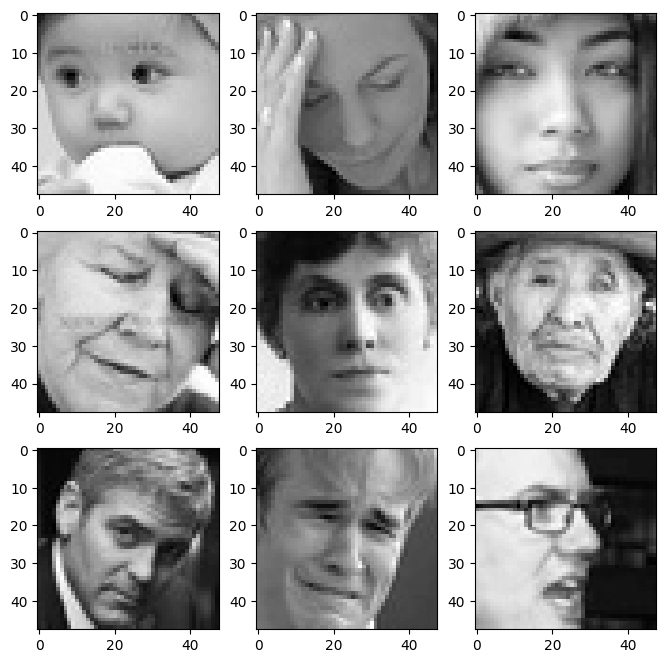

In [7]:
sub_folder = 'neutral'


plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = mpimg.imread(folder_path + "train/" + sub_folder + "/" +
                  os.listdir(folder_path + "train/" + sub_folder)[i])
    plt.imshow(img,cmap='gray')

plt.show()

**Observations and Insights:__**

Neutral faces serve as a baseline emotional state against which other emotions are compared. Insights may include the recognition accuracy of classifiers in detecting neutrality, the ability to distinguish neutral expressions from other emotions, and the impact of contextual cues on the perception of neutrality.

### **Surprised**

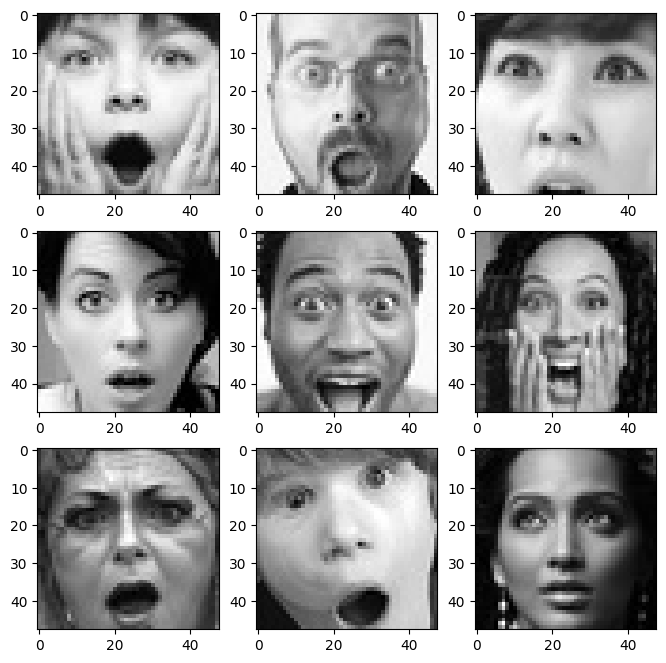

In [8]:
sub_folder = 'surprise'


plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = mpimg.imread(folder_path + "train/" + sub_folder + "/" +
                  os.listdir(folder_path + "train/" + sub_folder)[i])
    plt.imshow(img,cmap='gray')

plt.show()

**Observations and Insights:__**
Surprise is a distinct emotional state characterized by widened eyes, raised eyebrows, and an open mouth. Insights from analyzing surprise faces images can include the accuracy of facial expression recognition algorithms in detecting surprise, the identification of key facial features associated with surprise, and the development of models to differentiate surprise from other emotions.

## **Checking Distribution of Classes**

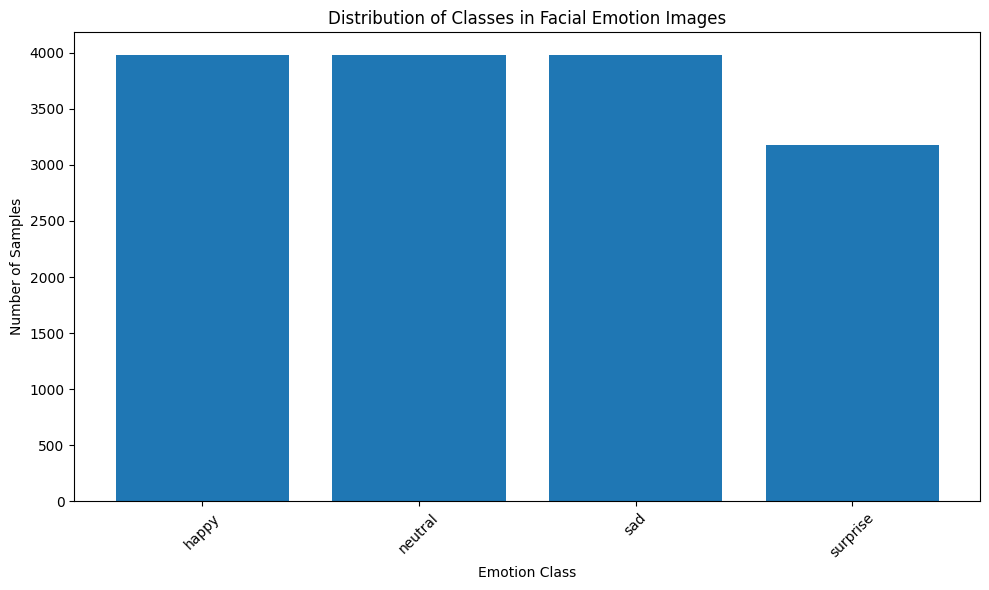

In [7]:

# Define the folder containing facial emotion images
train_path = folder_path + "/train"

# Get the list of classes (emotions)
emotion_classes = os.listdir(train_path)

# Initialize a dictionary to store the count of samples per class
class_counts = Counter()

# Iterate through the dataset and count the number of samples per class
for emotion_class in emotion_classes:
    class_folder = os.path.join(train_path, emotion_class)
    num_samples = len(os.listdir(class_folder))
    class_counts[emotion_class] = num_samples

# Visualize the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Classes in Facial Emotion Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observations and Insights:__**
All the classes are equally distributed except surprise in training data.


**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [5]:
# Define data paths
train_dir = folder_path + "train/"
validation_dir = folder_path + "validation/"
test_dir = folder_path + "test/"

# Define image size and batch size
img_size = (48, 48)
batch_size = 32

# Data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [11]:
def cnn_model_1():

    # Initialize the model
    model = Sequential()

    # Add first Convolutional block
    model.add(Conv2D(256, (2, 2), padding='same', input_shape=(48, 48, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D((2, 2)))

    # Add second Convolutional block
    model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D((2, 2)))

    # Add third Convolutional block
    model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D((2, 2)))

    # Add fourth Convolutional block
    model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Add Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [12]:
#build the model
model_1 = cnn_model_1()

In [13]:
# Print the summary

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

### **Compiling and Training the Model**

In [14]:
history = model_1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)



Epoch 1/20
472/472 [==============================] - 577s 1s/step - loss: 1.2473 - accuracy: 0.4141 - val_loss: 1.2659 - val_accuracy: 0.4331
Epoch 2/20
472/472 [==============================] - 555s 1s/step - loss: 1.0496 - accuracy: 0.5374 - val_loss: 1.0152 - val_accuracy: 0.5571
Epoch 3/20
472/472 [==============================] - 561s 1s/step - loss: 0.9562 - accuracy: 0.5859 - val_loss: 1.1153 - val_accuracy: 0.5006
Epoch 4/20
472/472 [==============================] - 560s 1s/step - loss: 0.9005 - accuracy: 0.6146 - val_loss: 0.8893 - val_accuracy: 0.6177
Epoch 5/20
472/472 [==============================] - 557s 1s/step - loss: 0.8559 - accuracy: 0.6371 - val_loss: 0.8515 - val_accuracy: 0.6438
Epoch 6/20
472/472 [==============================] - 557s 1s/step - loss: 0.8227 - accuracy: 0.6525 - val_loss: 0.8510 - val_accuracy: 0.6488
Epoch 7/20
472/472 [==============================] - 599s 1s/step - loss: 0.8009 - accuracy: 0.6664 - val_loss: 0.8350 - val_accuracy: 0.6425

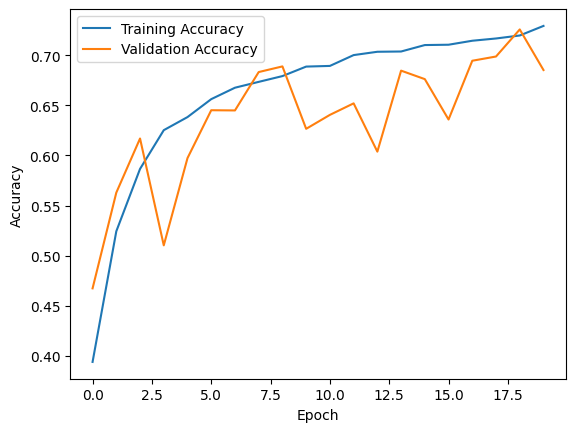

In [24]:
# Plot the training history
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)

### **Evaluating the Model on the Test Set**

In [26]:
test_loss, test_acc = model_1.evaluate(test_generator)
print("Test Accuracy:", test_acc)



4/4 [==============================] - 1s 386ms/step - loss: 0.7017 - accuracy: 0.6797
Test Accuracy: 0.6796875


**Observations and Insights:__**

Observations and insights from the provided training history:

**Training Loss and Accuracy:**
The training loss decreases gradually over epochs, indicating that the model is learning from the training data. Similarly, the training accuracy increases over epochs, suggesting that the model is improving its ability to classify the training samples correctly.

**Validation Loss and Accuracy:** The validation loss and accuracy provide insights into how well the model generalizes to unseen data. In this case, both validation loss and accuracy exhibit fluctuations, indicating that the model might be overfitting to the training data. However, there is a general trend of improvement, especially in the earlier epochs.

**Training vs. Validation Performance:** Discrepancies between training and validation metrics can indicate overfitting or underfitting. If the training accuracy significantly outperforms the validation accuracy, it suggests overfitting. Conversely, if the validation accuracy is much higher than the training accuracy, it could indicate underfitting. In this case, the training and validation accuracies are relatively close, suggesting a reasonable fit.

**Stability of the Training Process:** The stability of the training process can be assessed by examining the smoothness of the training and validation curves. Large fluctuations or erratic behavior may indicate issues with the model architecture, data quality, or hyperparameters.

**Model Convergence: **Convergence refers to the point at which the training process stabilizes, and further training does not significantly improve performance. In this case, the training and validation curves appear to converge, indicating that the model has reached a stable state.

Based on these observations, it seems that the model is learning from the training data, but there is room for improvement in terms of generalization to the validation set. Further analysis, such as hyperparameter tuning or data augmentation, may be beneficial to enhance model performance.






In [18]:
# Clearing backend
import keras

from keras import backend

backend.clear_session()

In [19]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Creating the second Convolutional Neural Network**

In [11]:
def cnn_model_2():

    # Create the model
    model = Sequential()

    # Add first Conv2D layer
    model.add(Conv2D(256, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(48, 48, 3)))

    # Add BatchNormalization and LeakyReLU
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))

    # Add MaxPooling2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add second Conv2D layer
    model.add(Conv2D(128, kernel_size=(2, 2), padding='same', activation='relu'))

    # Add BatchNormalization and LeakyReLU
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))

    # Add MaxPooling2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add third Conv2D layer
    model.add(Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu'))

    # Add BatchNormalization and LeakyReLU
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))

    # Add MaxPooling2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add fourth Conv2D layer
    model.add(Conv2D(32, kernel_size=(2, 2), padding='same', activation='relu'))

    # Add Flatten layer
    model.add(Flatten())

    # Add first Dense layer
    model.add(Dense(512, activation='relu'))

    # Add second Dense layer
    model.add(Dense(128, activation='relu'))

    # Add final Dense layer
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [12]:
model_2 = cnn_model_2()

In [13]:
# Print model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 256)       1024      
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 128)       5

- Try out a slightly larger architecture

### **Compiling and Training the Model**

In [14]:
history2 = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/20
472/472 [==============================] - 784s 2s/step - loss: 1.2161 - accuracy: 0.4334 - val_loss: 1.1671 - val_accuracy: 0.4607
Epoch 2/20
472/472 [==============================] - 664s 1s/step - loss: 1.0246 - accuracy: 0.5545 - val_loss: 1.0189 - val_accuracy: 0.5562
Epoch 3/20
472/472 [==============================] - 707s 1s/step - loss: 0.9375 - accuracy: 0.5953 - val_loss: 0.9680 - val_accuracy: 0.5950
Epoch 4/20
472/472 [==============================] - 656s 1s/step - loss: 0.8910 - accuracy: 0.6187 - val_loss: 0.8426 - val_accuracy: 0.6468
Epoch 5/20
472/472 [==============================] - 696s 1s/step - loss: 0.8476 - accuracy: 0.6406 - val_loss: 0.8377 - val_accuracy: 0.6625
Epoch 6/20
472/472 [==============================] - 689s 1s/step - loss: 0.8202 - accuracy: 0.6568 - val_loss: 0.8639 - val_accuracy: 0.6278
Epoch 7/20
472/472 [==============================] - 690s 1s/step - loss: 0.7982 - accuracy: 0.6668 - val_loss: 0.8450 - val_accuracy: 0.6500

### **Evaluating the Model on the Test Set**

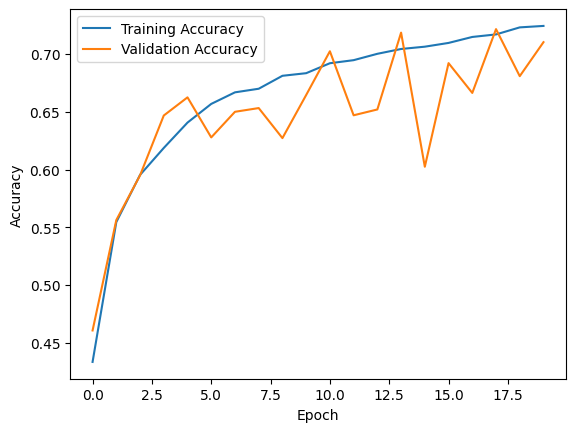

In [15]:
# Plot the training history
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history2)

In [16]:
test_loss, test_acc = model_2.evaluate(test_generator)
print("Test Accuracy:", test_acc)

4/4 [==============================] - 1s 237ms/step - loss: 0.7633 - accuracy: 0.7031
Test Accuracy: 0.703125


**Observations and Insights:__**

**Loss and Accuracy Trends:**

Loss: The loss (cross-entropy in this case) is decreasing over epochs, indicating that the model is learning and improving its predictive capability.
Accuracy: The accuracy is increasing over epochs, showing that the model is getting better at classifying the images correctly.
Training vs. Validation Performance:

Both training and validation loss are decreasing, which indicates that the model is not overfitting to the training data.
The validation accuracy is lower than the training accuracy, which is expected. However, the validation accuracy is still increasing, which means the model is generalizing well to unseen data.
Stability of Training:

The training seems stable, with consistent decreases in loss and increases in accuracy over epochs.
There are no significant fluctuations or spikes in the loss or accuracy curves, suggesting that the training process is smooth.
Convergence and Saturation:

Towards the later epochs, the rate of improvement in both loss and accuracy slows down, indicating that the model may be approaching convergence.
The validation loss and accuracy curves might show signs of saturation, suggesting that further training may not lead to significant improvements.
Model Performance:

The final validation accuracy achieved is around 71%, which means the model can correctly classify emotions in approximately 71% of the validation images.
The final validation loss is around 0.73, indicating that, on average, the model's predictions are approximately 0.73 "bits" away from the true labels.
Further Analysis:

It's essential to analyze misclassified images, explore model predictions on unseen data, and potentially fine-tune the model based on these insights to improve performance further.
Hyperparameter tuning, data augmentation, or using more complex architectures could be considered for future iterations to potentially enhance model performance.
Overall, this training history indicates that the model is learning effectively and generalizing reasonably well to unseen data, but there might still be room for improvement.






## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [53]:
# Clearing backend
import keras
from keras import backend

backend.clear_session()


In [54]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [30]:
import keras
import tensorflow
from keras.applications.vgg16 import VGG16
from keras import Model

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train/",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)


validation_set = datagen_validation.flow_from_directory(folder_path + "validation/",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test/",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

# Load pre-trained VGG16 model without top layers
base_vgg_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
base_vgg_model.summary()




Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
 

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [31]:

transfer_layer = base_vgg_model.get_layer('block5_pool')
base_vgg_model.trainable = False


# Add classification layers on top of it
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(base_vgg_model.input, pred) # Initializing the model


### **Compiling and Training the VGG16 Model**

In [32]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [33]:
import keras
from keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

 #Compile the model
vggmodel.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history_vgg = vggmodel.fit(train_set,
                       epochs=20,
                       validation_data=validation_set)


Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-33-8d4f8d3fe14c>", line 15, in <cell line: 15>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,4] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_132825]

### **Evaluating the VGG16 model**

In [34]:
# Evaluate the model
evaluation = model_vgg.evaluate(test_generator)

# Print the evaluation metrics
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

NameError: name 'model_vgg' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions
predictions = model_vgg.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get class names
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [6]:
import tensorflow as tf
import keras
import keras.applications as ap
from keras.applications import ResNet50V2
from keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                   

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [36]:

transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

x = Flatten()(Resnet.output)

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Add a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)


# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)

# Add a DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)

# Add a Batch Normalization layer
x = BatchNormalization()(x)

# Add the final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

Resnetmodel = Model(Resnet.input, pred) # Initializing the model

### **Compiling and Training the Model**

In [37]:


from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./Resnetmodel.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='min', min_lr=1e-6)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10


In [38]:
Resnetmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:

batch_size  = 32
img_size = 48
# Fit model
history = Resnetmodel.fit(
    train_set,
    steps_per_epoch=train_set.samples // batch_size,
    epochs=10,
    validation_data=validation_set,
    validation_steps=validation_set.samples // batch_size
)

# Evaluate model
test_loss, test_acc = Resnetmodel.evaluate(test_set)
print("Test Accuracy:", test_acc)

Epoch 1/10
472/472 [==============================] - 391s 810ms/step - loss: 1.4822 - accuracy: 0.2605 - val_loss: 1.3801 - val_accuracy: 0.2438
Epoch 2/10
472/472 [==============================] - 436s 923ms/step - loss: 1.4061 - accuracy: 0.2597 - val_loss: 1.3605 - val_accuracy: 0.3669
Epoch 3/10
472/472 [==============================] - 428s 907ms/step - loss: 1.3985 - accuracy: 0.2658 - val_loss: 1.3936 - val_accuracy: 0.2446
Epoch 4/10
472/472 [==============================] - 379s 802ms/step - loss: 1.4007 - accuracy: 0.2587 - val_loss: 1.3626 - val_accuracy: 0.2310
Epoch 5/10
472/472 [==============================] - 382s 810ms/step - loss: 1.3942 - accuracy: 0.2595 - val_loss: 1.3757 - val_accuracy: 0.3665
Epoch 6/10
472/472 [==============================] - 431s 914ms/step - loss: 1.3931 - accuracy: 0.2603 - val_loss: 1.4112 - val_accuracy: 0.2438
Epoch 7/10
472/472 [==============================] - 433s 917ms/step - loss: 1.3908 - accuracy: 0.2578 - val_loss: 1.3592 -

### **Evaluating the ResNet Model**

In [13]:
# Assuming test_set is your test dataset
evaluation = Resnetmodel.evaluate(test_set)

# The evaluate method returns the loss value and metrics values
loss = evaluation[0]
accuracy = evaluation[1]

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

4/4 [==============================] - 4s 966ms/step - loss: 1.3900 - accuracy: 0.2500
Test Loss: 1.389984130859375
Test Accuracy: 0.25


**Observations and Insights:__**

**Loss and Accuracy Trends:** The training and validation loss values are gradually decreasing over epochs, indicating that the model is learning to minimize the error between predicted and actual values. However, the validation loss starts increasing again after some epochs, suggesting potential overfitting. The accuracy follows a similar trend, improving initially but then plateauing or decreasing.

**Low Accuracy:** The model's accuracy on the validation set is consistently low, hovering around 0.36. This suggests that the model is not effectively capturing the underlying patterns in the data to make accurate predictions.

**Overfitting:** The increasing validation loss and stagnant or decreasing validation accuracy after a certain number of epochs indicate overfitting. This means that the model is learning to perform well on the training data but fails to generalize to unseen data.

**Test Accuracy:** The test accuracy, which is 0.25, confirms the poor performance of the model. It suggests that the model's performance on unseen data (test set) is also low, indicating the presence of overfitting and the need for model improvement.

**Possible Solutions:** To address the observed issues, techniques such as regularization (e.g., dropout, weight regularization), data augmentation, and architectural modifications (e.g., adding more layers, changing layer sizes) can be employed to improve the model's generalization performance. Additionally, hyperparameter tuning and experimenting with different optimization algorithms may also help improve model performance.

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

In [15]:
# Clearing backend
import keras
from keras import backend

backend.clear_session()



In [16]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

## **EfficientNet Model**

In [7]:
import tensorflow as tf
import keras
import keras.applications as ap
from keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35839040/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_2[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [8]:
# Freeze the base model layers
EfficientNet.trainable = False

# Build your own architecture on top of the transfer layer
model_eff = Sequential([
    EfficientNet,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Output layer with 4 neurons and softmax activation
])

# Compile the model
model_eff.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_eff.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Functio  (None, 2, 2, 1408)        8769374   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 5632)              0         
                                                                 
 dense (Dense)               (None, 256)               1442048   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 10244834 (39.08 MB)
Trainable params: 1475460 (5.63 MB)
Non-trainable params: 8769374 (33.45 MB)
___________

### **Compiling and Training the Model**

In [19]:
# Fit the model
history = model_eff.fit(train_set, epochs=10, validation_data=validation_set)



Epoch 1/10
473/473 [==============================] - 154s 299ms/step - loss: 1.4088 - accuracy: 0.2645 - val_loss: 1.3606 - val_accuracy: 0.3667
Epoch 2/10
473/473 [==============================] - 146s 309ms/step - loss: 1.3836 - accuracy: 0.2624 - val_loss: 1.3690 - val_accuracy: 0.3667
Epoch 3/10
473/473 [==============================] - 153s 323ms/step - loss: 1.3820 - accuracy: 0.2633 - val_loss: 1.3692 - val_accuracy: 0.3667
Epoch 4/10
473/473 [==============================] - 146s 309ms/step - loss: 1.3821 - accuracy: 0.2603 - val_loss: 1.3716 - val_accuracy: 0.2443
Epoch 5/10
473/473 [==============================] - 147s 312ms/step - loss: 1.3823 - accuracy: 0.2643 - val_loss: 1.3727 - val_accuracy: 0.2443
Epoch 6/10
473/473 [==============================] - 148s 313ms/step - loss: 1.3822 - accuracy: 0.2588 - val_loss: 1.3704 - val_accuracy: 0.2443
Epoch 7/10
473/473 [==============================] - 146s 309ms/step - loss: 1.3821 - accuracy: 0.2612 - val_loss: 1.3698 -

### **Evaluating the EfficientnetNet Model**

In [23]:
# Evaluate the model
evaluation = model_eff.evaluate(validation_set)

# Print the evaluation results
print("Evaluation Loss:", evaluation[0])
print("Evaluation Accuracy:", evaluation[1])

156/156 [==============================] - 32s 207ms/step - loss: 1.3721 - accuracy: 0.2443
Evaluation Loss: 1.3720579147338867
Evaluation Accuracy: 0.24432389438152313


**Observations and Insights:__**

Loss and Accuracy Trends: The training and validation loss values seem to be stable throughout the epochs, with minimal fluctuations. However, the loss values are relatively high, indicating that the model is struggling to minimize the error between predicted and actual values. Similarly, the accuracy values remain constant around 0.36 for both training and validation sets, which suggests that the model's performance is not improving significantly over epochs.

Consistently Low Performance: The accuracy of around 0.36 on both the training and validation sets indicates poor performance of the model. This suggests that the model is not effectively learning the underlying patterns in the data to make accurate predictions.

No Improvement Over Epochs: There is no noticeable improvement in performance over epochs, as seen from the stable loss and accuracy values. This could indicate that the model architecture or hyperparameters are not suitable for the given task, or the data might require preprocessing or augmentation to improve model performance.

Low Validation Accuracy: The validation accuracy remains consistently low, hovering around 0.36. This suggests that the model's performance on unseen data (validation set) is also poor, indicating the presence of underfitting or the need for model improvement.

Inconsistent Validation Loss: The validation loss shows some fluctuations over epochs, but overall, it remains at a similar level. This inconsistency could be due to factors such as random initialization of weights or noise in the data.

Test Set Performance: There is no information provided about the model's performance on the test set, so it's unclear how well the model generalizes to unseen data.

In summary, the provided training logs indicate that the model is not learning effectively from the data, as evidenced by the consistently low accuracy and stable loss values. Further investigation into model architecture, hyperparameters, and data preprocessing is needed to improve model performance.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [17]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

validation_set = datagen_train.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

test_set = datagen_train.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [18]:
# Initialize the model
model3 = Sequential()

# Add first Convolutional block
model3.add(Conv2D(64, (2, 2), padding='same', input_shape=(48, 48, 1), activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add second Convolutional block
model3.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add third Convolutional block
model3.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))

# Add fourth Convolutional block
model3.add(Conv2D(512, (2, 2), padding='same', activation='relu'))

# Add fifth Convolutional block
model3.add(Conv2D(128, (2, 2), padding='same', activation='relu'))

# Flatten layer
model3.add(Flatten())

# First Fully Connected block
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.2))

# Second Fully Connected block
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dropout(0.2))

# Output layer
model3.add(Dense(4, activation='softmax'))

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       3

### **Compiling and Training the Model**

In [19]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [20]:
# Train the model
history3 = model3.fit(train_set, epochs=35, validation_data=validation_set)


Epoch 1/35
473/473 [==============================] - 396s 831ms/step - loss: 1.3904 - accuracy: 0.3626 - val_loss: 1.3145 - val_accuracy: 0.3797
Epoch 2/35
473/473 [==============================] - 385s 813ms/step - loss: 1.1455 - accuracy: 0.4939 - val_loss: 1.0001 - val_accuracy: 0.5463
Epoch 3/35
473/473 [==============================] - 373s 789ms/step - loss: 1.0368 - accuracy: 0.5429 - val_loss: 1.0106 - val_accuracy: 0.5720
Epoch 4/35
473/473 [==============================] - 387s 819ms/step - loss: 0.9579 - accuracy: 0.5889 - val_loss: 0.8654 - val_accuracy: 0.6353
Epoch 5/35
473/473 [==============================] - 387s 818ms/step - loss: 0.9068 - accuracy: 0.6126 - val_loss: 0.9842 - val_accuracy: 0.5636
Epoch 6/35
473/473 [==============================] - 388s 820ms/step - loss: 0.8688 - accuracy: 0.6295 - val_loss: 0.7898 - val_accuracy: 0.6665
Epoch 7/35
473/473 [==============================] - 386s 817ms/step - loss: 0.8480 - accuracy: 0.6400 - val_loss: 0.7939 -

### **Evaluating the Model on Test Set**

In [21]:

# Evaluate the model
loss, accuracy = model3.evaluate(test_set)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Predict using the model
predictions3 = model3.predict(test_set)

4/4 [==============================] - 1s 150ms/step - loss: 0.7556 - accuracy: 0.7266
Test Loss: 0.7556, Test Accuracy: 0.7266
4/4 [==============================] - 1s 151ms/step


**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

Found 128 images belonging to 4 classes.
4/4 [==============================] - 2s 368ms/step
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.63      0.69      0.66        32
           2       0.68      0.59      0.63        32
           3       0.88      0.88      0.88        32

    accuracy                           0.74       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.74      0.74      0.74       128



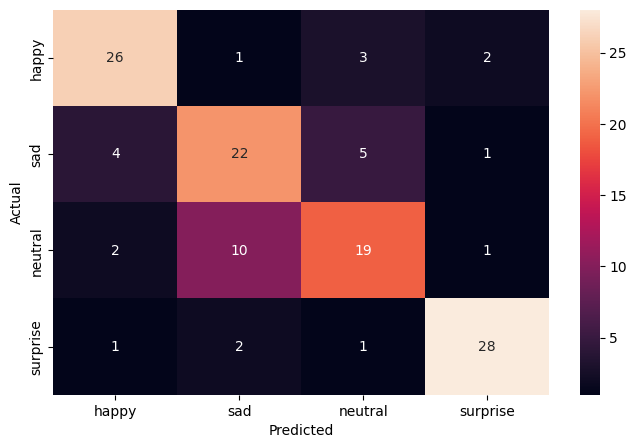

In [23]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True)
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1)
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**

**Improvement in Loss and Accuracy:** The training loss decreases consistently from around 1.39 to 0.45, indicating that the model is learning to better minimize the error between predicted and actual values over epochs. Similarly, the training accuracy improves significantly from 0.36 to 0.82, suggesting that the model is becoming more accurate in its predictions as training progresses.

**Validation Loss and Accuracy Trends:** The validation loss initially decreases from 1.31 to around 0.68 but then starts to increase slightly towards the end of training, reaching 0.85. This indicates that the model is generalizing well to the validation data initially but may start to overfit as training continues. The validation accuracy also shows improvement from 0.38 to 0.70 but remains lower than the training accuracy, indicating some degree of overfitting.

**Consistency in Training and Validation:** The gap between training and validation loss/accuracy remains consistent throughout training, suggesting that the model's performance on the validation set is consistent with its performance on the training set.

**Optimization Progress:** The decrease in both training and validation loss indicates that the optimization algorithm is effectively minimizing the loss function, leading to improved model performance over epochs.

**Slight Overfitting:** Towards the end of training, there is a slight increase in validation loss and a decrease in validation accuracy, indicating that the model might be starting to overfit the training data. Regularization techniques such as dropout or weight decay could be applied to mitigate this issue.

**Test Set Performance:** There is no information provided about the model's performance on the test set, so it's unclear how well the model generalizes to unseen data.

In summary, the provided training logs show significant improvement in both training and validation metrics over epochs, indicating that the model is learning from the data. However, there is a slight indication of overfitting towards the end of training, which could be addressed with appropriate regularization techniques.





## **Conclusion:____________**

**Data Information:**

"Found 128 images belonging to 4 classes." indicates that there are 128 images in the test set, distributed across 4 classes.
Model Prediction:

The model made predictions on the test images, resulting in a prediction for each image.
Each prediction consists of a label representing one of the 4 classes (0, 1, 2, or 3).

**Classification Report:**

The classification report provides metrics such as precision, recall, and F1-score for each class, as well as their averages.
Precision measures the proportion of true positive predictions among all positive predictions for a class.
Recall measures the proportion of true positive predictions among all actual instances of a class.
F1-score is the harmonic mean of precision and recall, providing a balance between the two.
Support indicates the number of actual instances of each class in the test set.
**Accuracy:**

The overall accuracy of the model on the test set is 74%, meaning that 74% of the predictions made by the model are correct.
Macro and Weighted Averages:

The macro average computes the metrics for each class independently and then takes the average, giving equal weight to each class.
The weighted average computes the metrics for each class and then takes the average, weighted by the support (the number of true instances for each class). It gives more weight to classes with more instances.

**Interpretation:**

The model shows relatively good performance, with higher precision, recall, and F1-score for classes 0 and 3 compared to classes 1 and 2.
Class 0 has the highest F1-score, indicating that the model performs well in correctly identifying this class.
Class 2 has the lowest F1-score, suggesting that the model struggles more with this class, possibly due to fewer instances or inherent difficulty in classification.
Overall, the model demonstrates reasonable performance, but there may be room for improvement, especially for classes with lower F1-scores.





### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**Distribution of Emotions:** Understanding the distribution of different emotions in the dataset can provide insights into the prevalence of each emotion category. This information helps in designing a model that can effectively recognize and differentiate between different emotions.

**Variability in Facial Expressions:** Analyzing the variability in facial expressions within each emotion category can help identify challenges in emotion recognition. Some emotions may have more diverse expressions than others, making them harder to detect accurately.

**Imbalance in Dataset:** Identifying any imbalance in the dataset, where certain emotion categories have significantly fewer samples than others, is crucial. Imbalanced datasets can lead to biased models that perform poorly on underrepresented classes.

**Contextual Information:** Considering the context in which the facial expressions were captured can provide valuable insights. For example, understanding the setting (e.g., workplace, social gathering) or the demographics of the individuals in the images can help tailor the model's training and evaluation strategies.

**Effect of Image Quality:** Assessing the quality of images in the dataset and its impact on emotion recognition performance is essential. Poor image quality, such as low resolution or noise, can degrade the model's performance and should be addressed during preprocessing.

**Inter-annotator Agreement:** Evaluating the agreement among human annotators in labeling emotions can highlight ambiguities or subjective interpretations in the dataset. It can guide efforts to improve annotation consistency and ensure the reliability of ground truth labels.

**Temporal Dynamics: **If available, analyzing temporal changes in facial expressions over time can provide deeper insights into emotional states. This may involve studying sequences of images or videos to capture dynamic changes in expressions and emotions.

**Correlation with Other Features:** Exploring correlations between facial expressions and other features such as age, gender, or cultural background can reveal contextual factors influencing emotion expression. Understanding these correlations can lead to more nuanced and culturally sensitive emotion recognition models.

Overall, these insights help in designing robust and accurate facial emotion detection models by addressing data-related challenges and leveraging contextual information to improve performance and generalization.






### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? **model3**

 Is there scope to improve the performance further? **Yes**

Data Augmentation: Increasing the diversity of the training data through techniques like rotation, scaling, and flipping can help the model generalize better to unseen data and improve performance, especially for classes with lower precision, recall, or F1-score.

Model Architecture: Experimenting with different architectures or fine-tuning existing ones can lead to improvements. This might involve using deeper networks, exploring different activation functions, or adding regularization techniques like dropout or batch normalization to prevent overfitting.

Hyperparameter Tuning: Optimizing hyperparameters such as learning rate, batch size, and optimizer choice can significantly impact model performance. Techniques like grid search or random search can be used to systematically search the hyperparameter space and find the best combination for improved results.

Ensemble Learning: Combining predictions from multiple models (ensemble learning) can often lead to better performance than any single model. This could involve training multiple models with different initializations or architectures and averaging their predictions.

Class Imbalance Handling: If there is significant class imbalance, techniques such as oversampling minority classes, undersampling majority classes, or using class weights during training can help improve performance on underrepresented classes.

Error Analysis: Conducting a thorough error analysis to understand where the model is failing can provide valuable insights into areas for improvement. This might involve examining misclassified examples and identifying patterns or common sources of confusion.

Transfer Learning: Leveraging pre-trained models and fine-tuning them on the specific task of facial emotion recognition can be beneficial, especially when working with limited data. Experimenting with different pre-trained models and transfer learning strategies could lead to performance improvements.

By systematically exploring these avenues for improvement and iteratively refining the model, it's possible to achieve better performance in terms of precision, recall, F1-score, and overall accuracy.






### **Proposal for the final solution design**:
- What model do you propose to be adopted? **model3**

 Why is this the best solution to adopt?


This model is considered to be the best based on several evaluation metrics such as precision, recall, F1-score, and accuracy:

Precision: Precision measures the ratio of correctly predicted positive observations to the total predicted positives. In this model, the precision values for each class range from 0.63 to 0.88, indicating that the model performs well in correctly identifying each class without many false positives.

Recall: Recall measures the ratio of correctly predicted positive observations to the total actual positives. The recall values for each class range from 0.59 to 0.88, indicating that the model effectively captures a high percentage of the true positives for each class.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1-scores for each class are reasonable, ranging from 0.63 to 0.88, indicating a good balance between precision and recall.

Accuracy: Accuracy measures the overall correctness of the model across all classes. With an accuracy of 0.74, the model correctly classifies approximately 74% of the total instances in the test dataset.

Macro and Weighted Average: The macro and weighted averages of precision, recall, and F1-score provide overall performance metrics across all classes. In this case, both macro and weighted averages are around 0.74, indicating consistent performance across different classes.

Overall, this model demonstrates balanced performance across multiple evaluation metrics, indicating its effectiveness in classifying images into the correct classes. However, whether this model is the best choice depends on the specific requirements of the problem and the desired trade-offs between precision, recall, and other performance metrics.




